# About Dataset

## Content
Each record in the database describes a Boston suburb or town.

CRIM:    per capita crime rate by town

ZN:      proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS:   proportion of non-retail business acres per town

CHAS:    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX:     nitric oxides concentration (parts per 10 million)

RM:      average number of rooms per dwelling

AGE:     proportion of owner-occupied units built prior to 1940

DIS:     weighted distances to ﬁve Boston employment centers

RAD:     index of accessibility to radial highways

TAX:     full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B:       proportion of blacks by town

LSTAT:   lower  status of the population

MEDV:    Median value of owner-occupied homes in $1000s


## Target feature => MEDV

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

## Reading and Transforming CSV File into DataFrame

In [2]:
# Reading the raw file content
file_path = 'housing.csv'
with open(file_path, 'r') as file:
    raw_data = file.read()

# Splitting the raw data by lines
lines = raw_data.splitlines()

# Splitting each line by whitespace to get the columns
data_list = [line.split() for line in lines]

# Converting the list of lists into a DataFrame
data = pd.DataFrame(data_list[:], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

## Sneak-Peak Into DataFrame

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


## Converting Each feature to numeric datatype

In [6]:
data = data.apply(pd.to_numeric, errors='coerce')

In [7]:
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Checking for null values

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

no null values were found!!

## Defining Each Function For EDA

### 1. To check Distribution

In [10]:
'''
A custom function for ploting kdeplot for each feature in a single image.
'''
def dist_custom(dataset, columns_list, suptitle):
    # Determing the number of rows and columns needed for the plots
    num_plots = len(columns_list)
    cols = 3
    rows = (num_plots // cols) + (num_plots % cols > 0)
    
    fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
    fig.suptitle(suptitle, y=1.02, size=25)
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))
    
    # Removing unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### 2. Boxplot

In [11]:
'''
A Custom function for Potting BoxPlots For Each Feature In a single Image
'''
def plot_boxplots(df):
    num_columns = len(df.columns)
    cols = 3
    rows = (num_columns // cols) + (num_columns % cols > 0)
    
    fig, axs = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    fig.suptitle('Box Plots of Each Column', y=1.02, size=25)
    axs = axs.flatten()
    
    for i, column in enumerate(df.columns):
        sns.boxplot(x=df[column], ax=axs[i])
        axs[i].set_title(f'Box plot of {column}')
    
    # Removing unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### 3. Identifying Outliers

In [12]:
def identify_outliers(df):
    outlier_columns = []
    # Calculating Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculating the Interquartile Range (IQR) for each column
    IQR = Q3 - Q1

    # Determining outliers for each column
    for column in df.columns:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(column)
    
    return outlier_columns

### 4. For Outlier Treatment(caping of outliers) 

In [13]:
'''
Funtion for Caping of extreme values each feature by either upper limit or lower limit
'''
def cap_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        df[col] = np.where(
            df[col] > upper_limit,
            upper_limit,
            np.where(
                df[col] < lower_limit,
                lower_limit,
                df[col]
            )
        )
    return df

### 5. yeo-Johnson Transformation for Skewness removal

In [14]:
def apply_yeo_johnson(df, columns):
    # Initializeing PowerTransformer with Yeo-Johnson method
    transformer = PowerTransformer(method='yeo-johnson', standardize=False)
    
    # Applying transformation to specified columns
    for column in columns:
        # Fit and transform the data
        df[column] = transformer.fit_transform(df[[column]])
    
    return df

### 6. Adjusted R2 score

In [15]:
'''
r2: R2 score of the model, which ranges from 0 to 1.
n: Total number of samples in the test set.
p: Number of features used in the model.
'''
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

## Function Calls

### For checking Distribution And Skewness of each feature

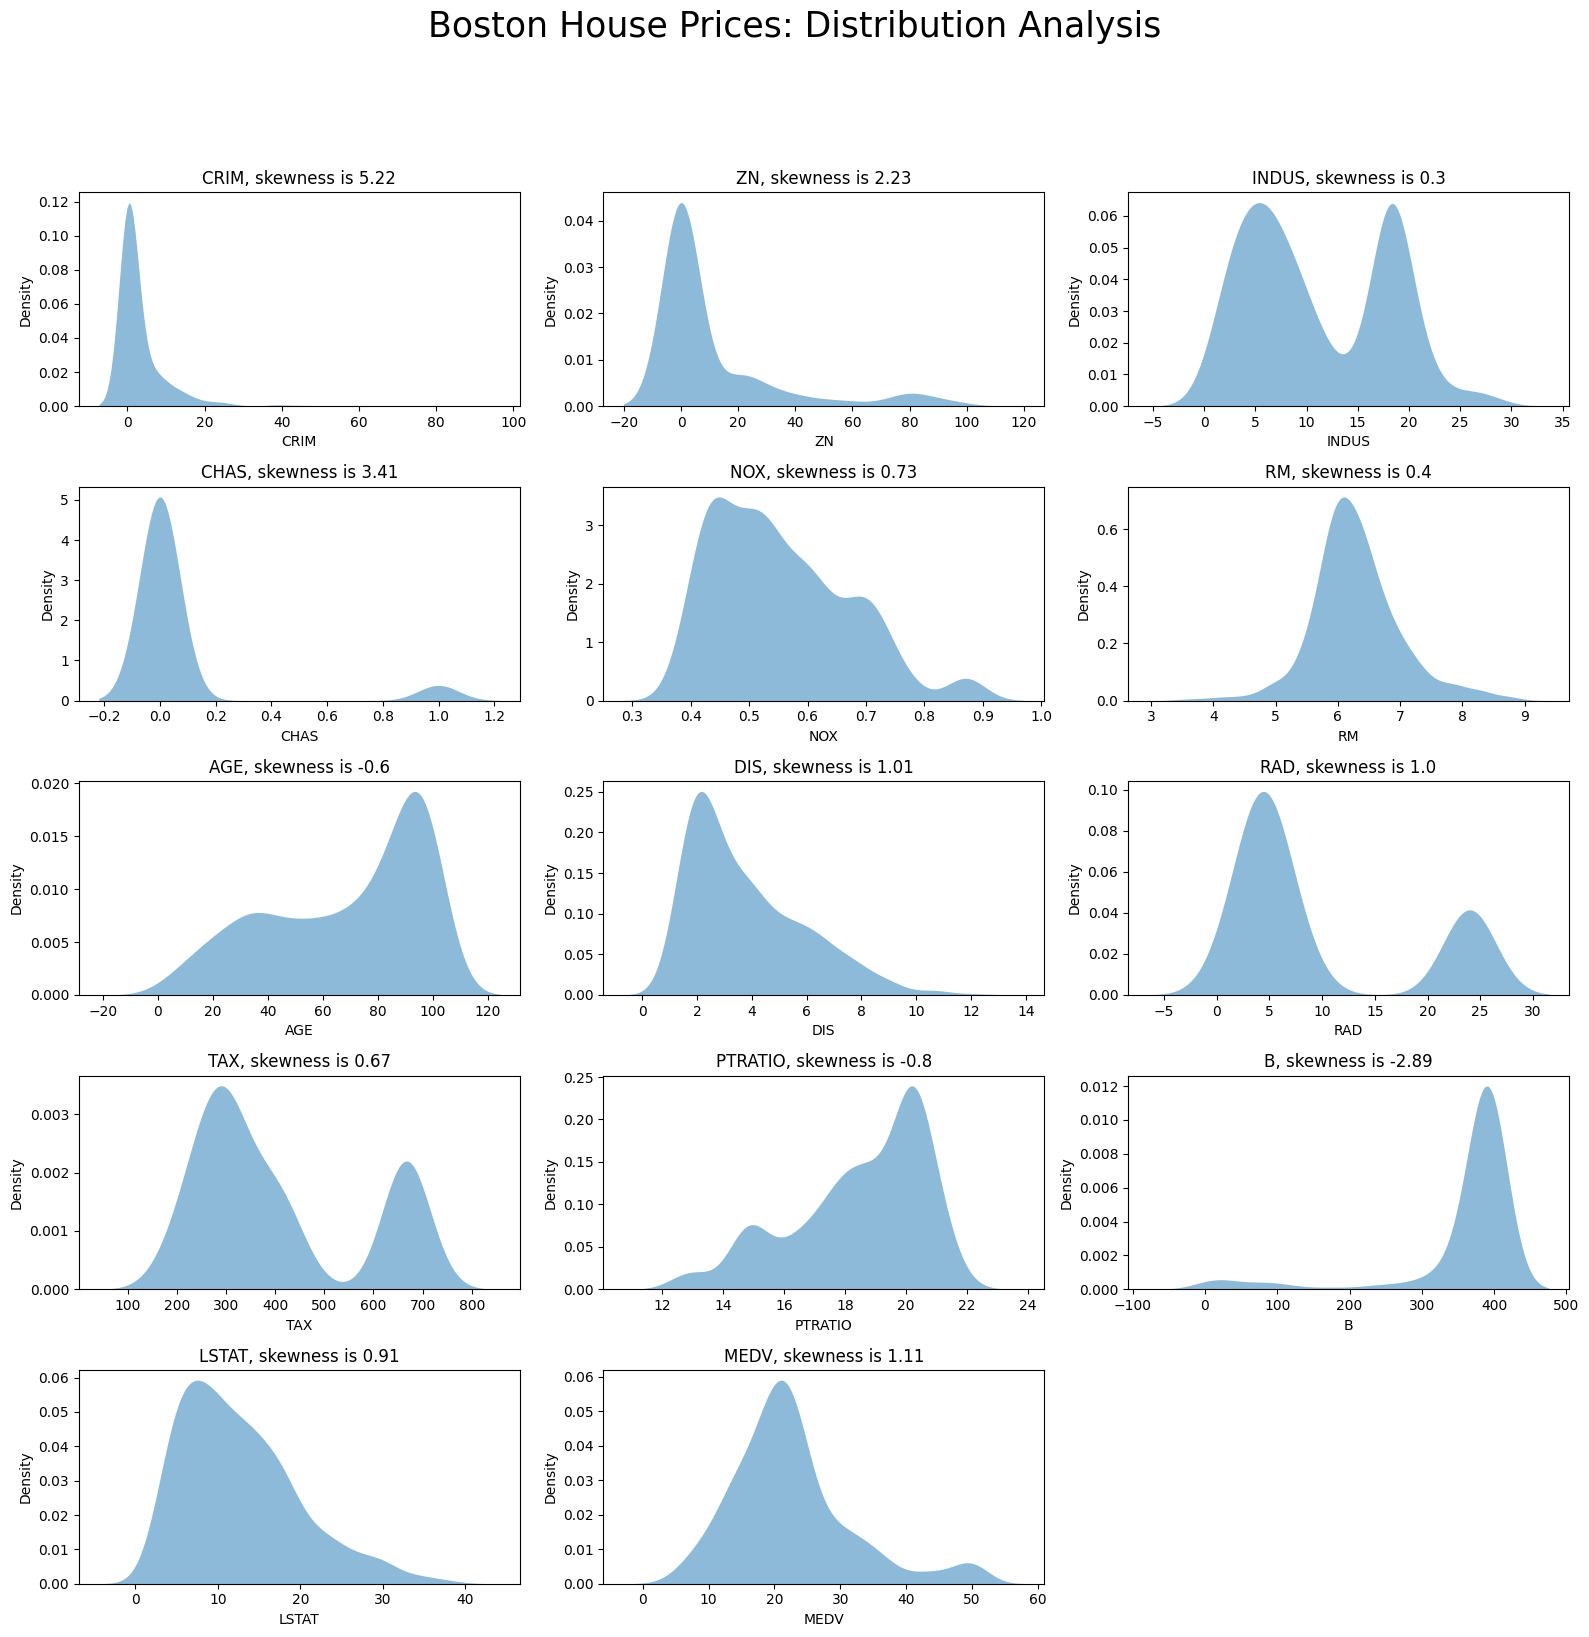

In [16]:
dist_custom(dataset=data, columns_list=data.columns, suptitle='Boston House Prices: Distribution Analysis')

### Observation
some of the features are highly skewed !!

### For visualizing Outliers

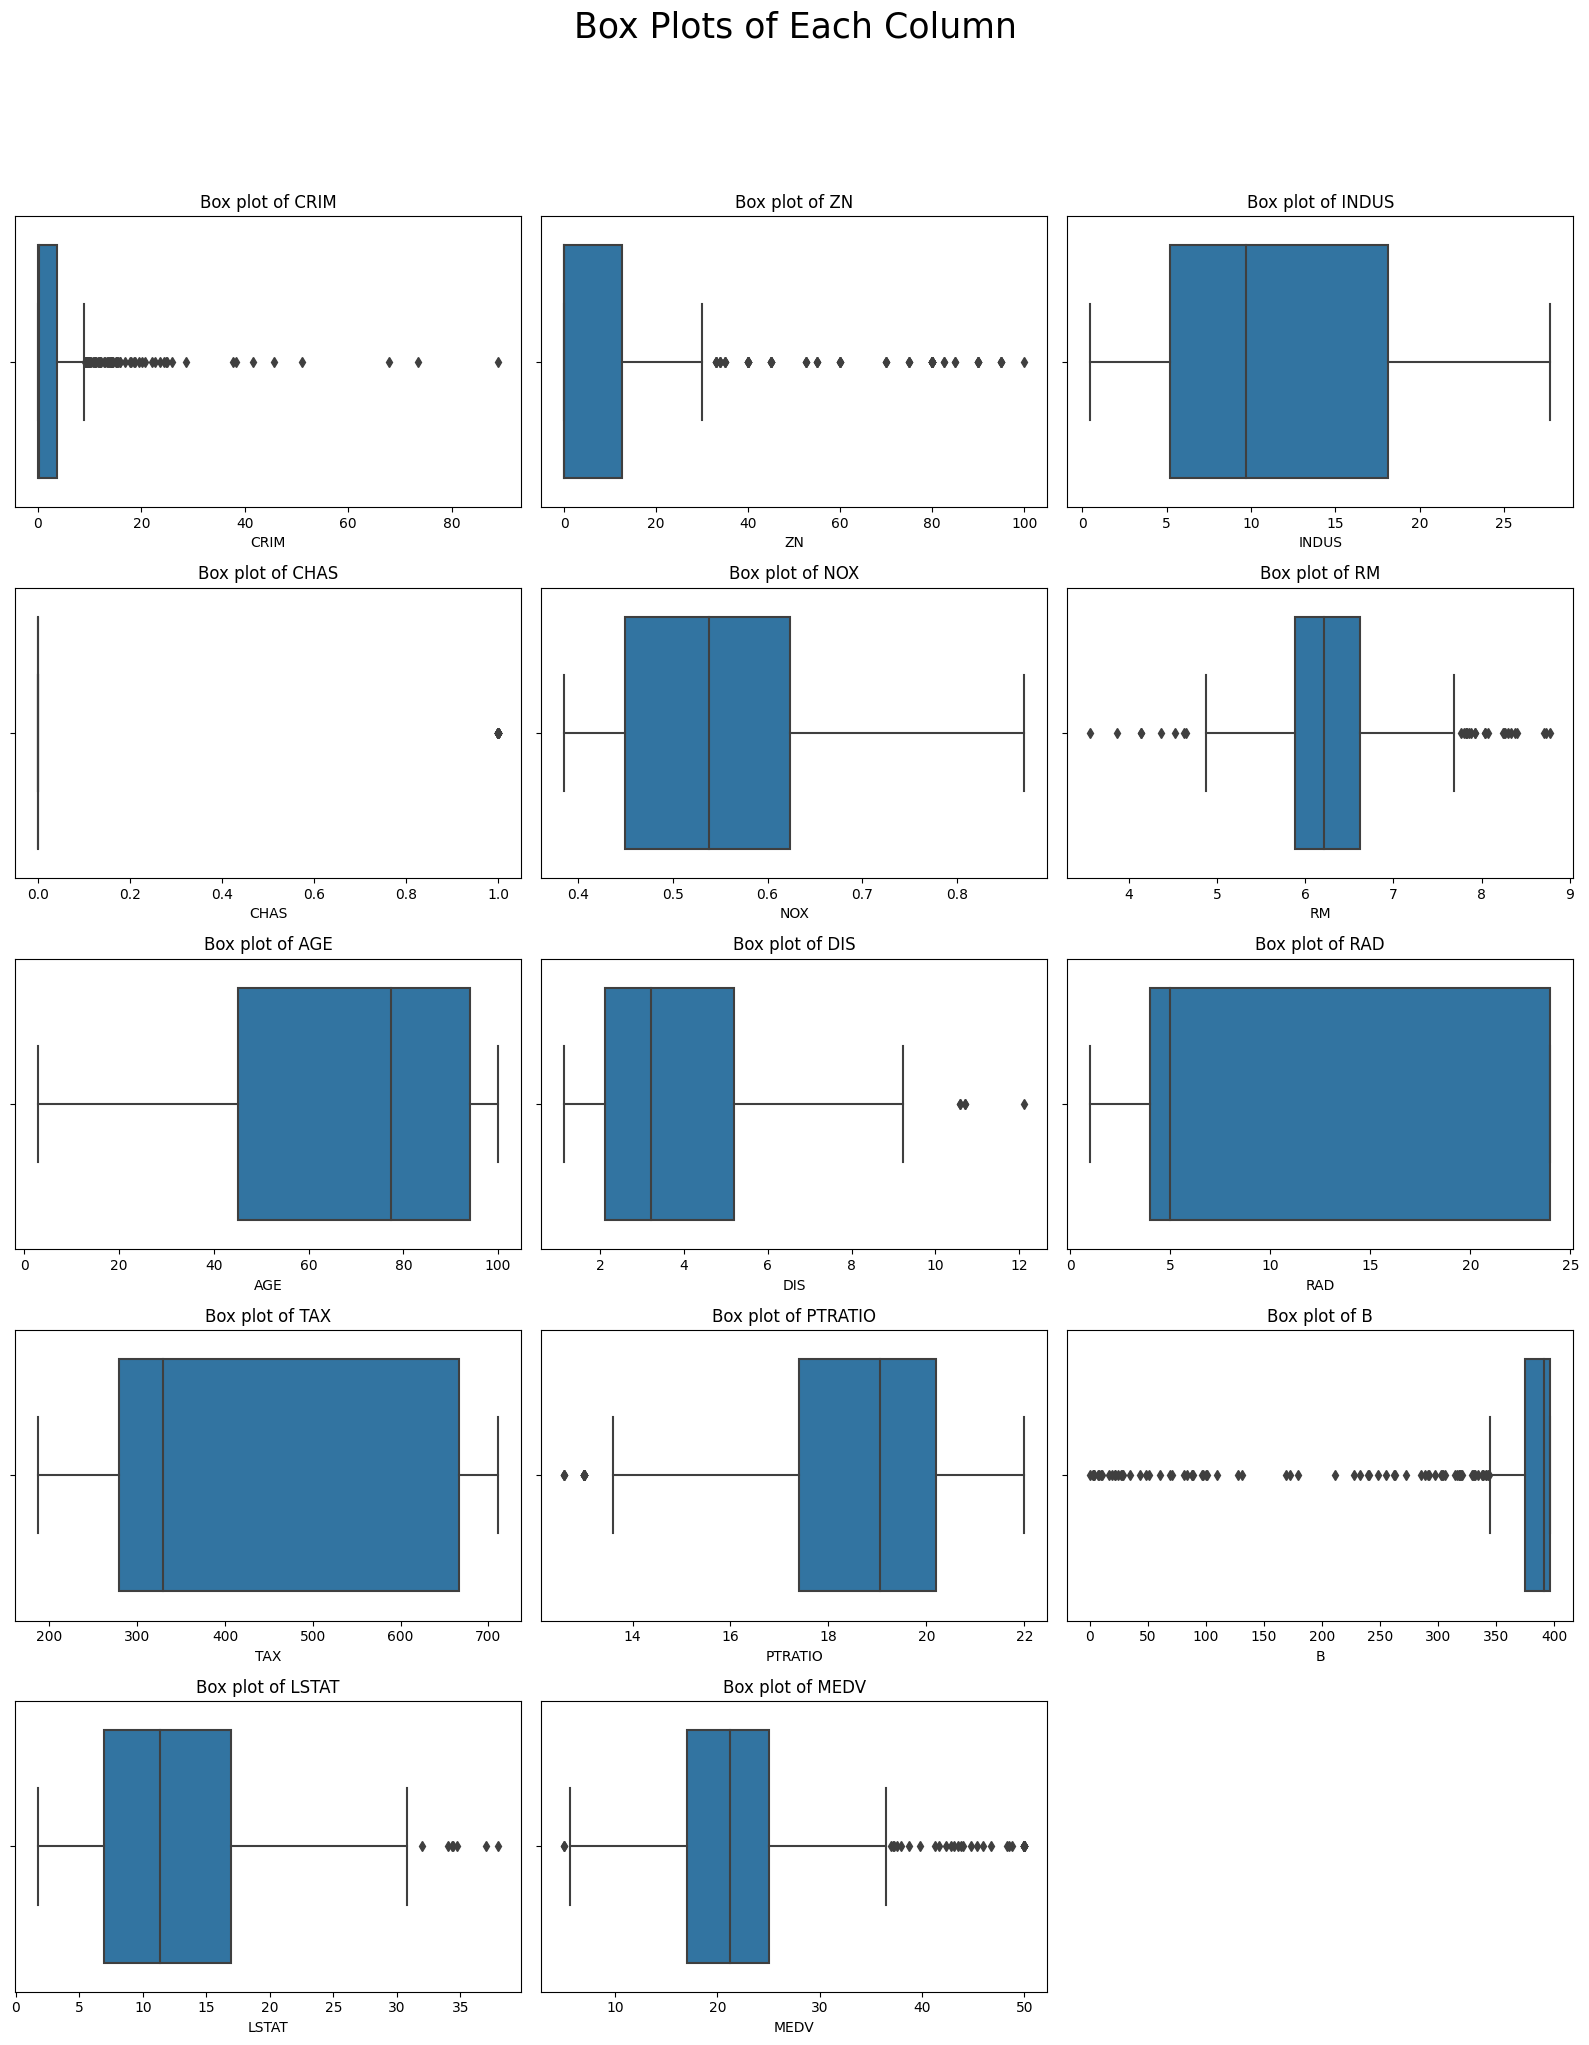

In [17]:
plot_boxplots(data)

### Observation:-
Outliers are present in few columns !!

### Outlier Treament !!

In [18]:
identify_outliers(data)

['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [19]:
columns=['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = cap_outliers(data, columns)

In [20]:
identify_outliers(data)

['CHAS']

CHAS was excluded because it had either 0 or 1 values and extreme values are necessary to keep the importance of the feature

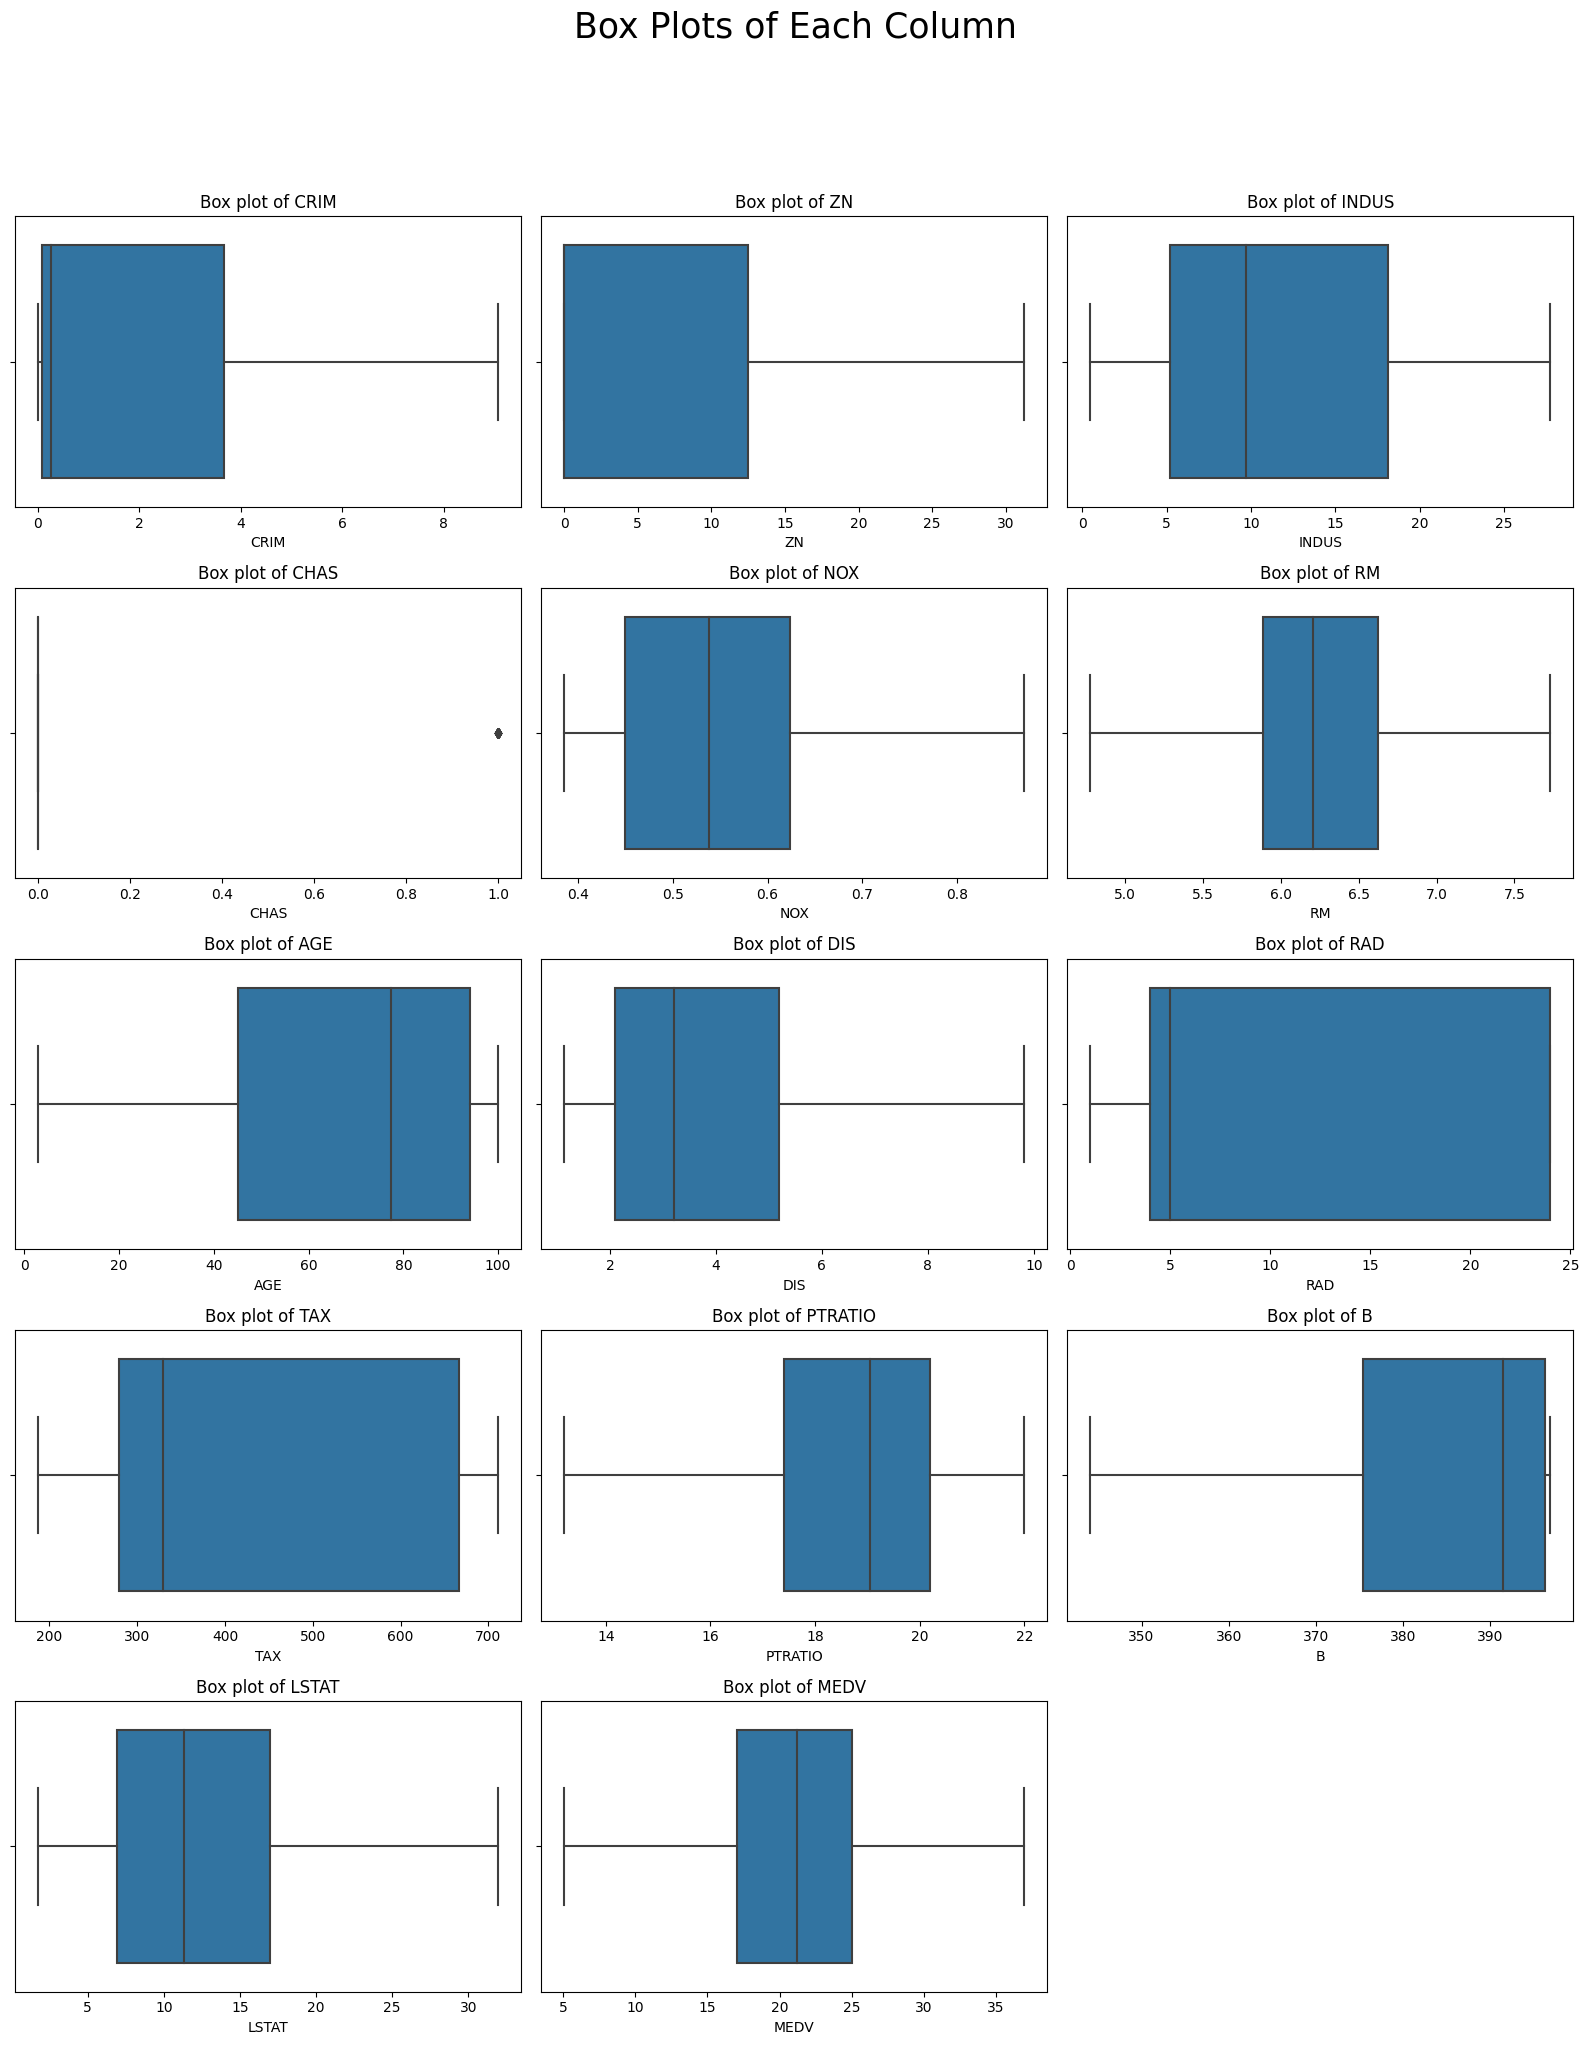

In [21]:
plot_boxplots(data)

## To check Correlation of each feature

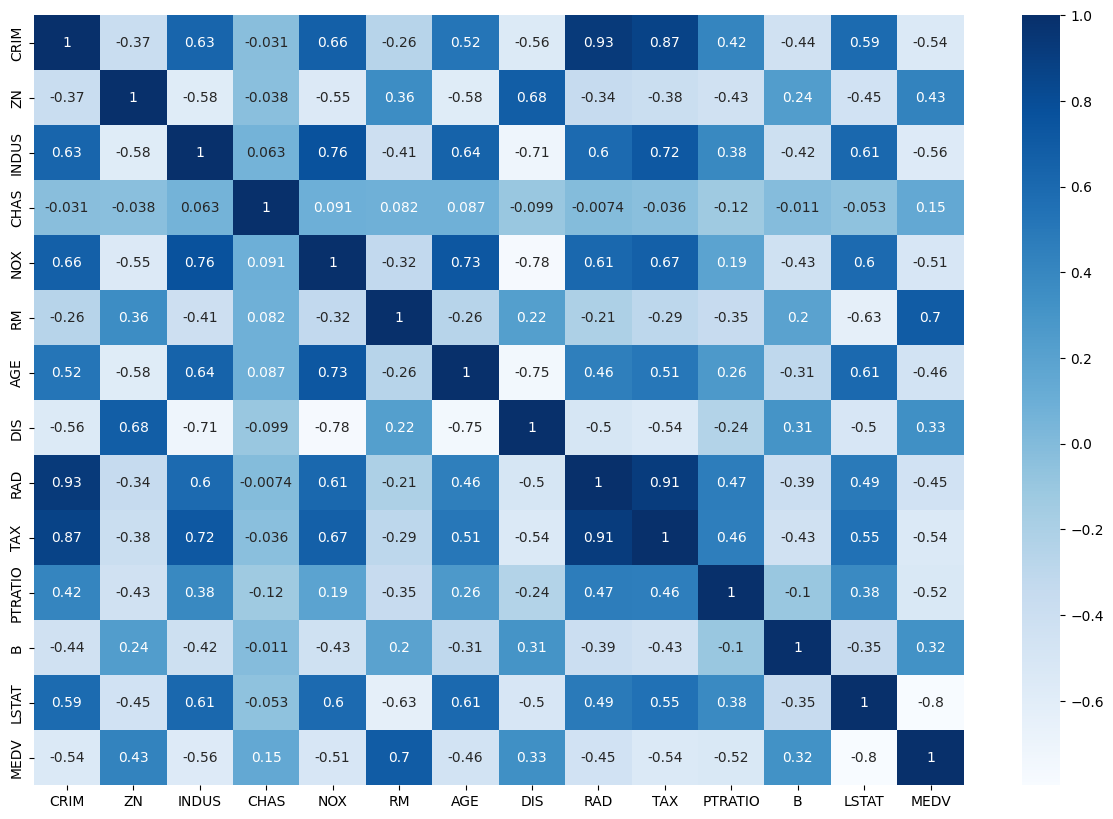

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

Here RAD and Tax were highly corelated to each other.Therefore we dropped RAD to remove it. It was done because on observing the graph carefully it was found that RAD was not highly correlated to MEDV.

In [23]:
data = data.drop(columns=['RAD'])

In [24]:
data.shape

(506, 13)

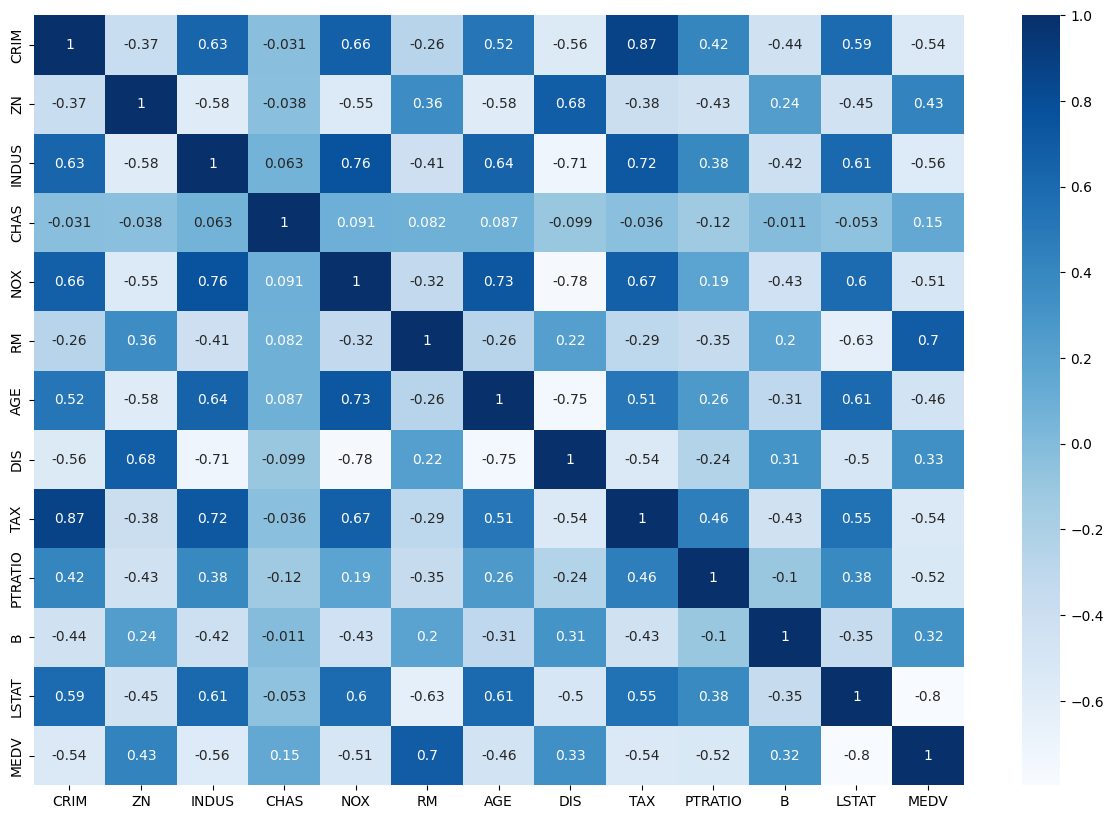

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

In [26]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Applying Yeo johnson to remove Skewness

In [27]:
columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']
df = apply_yeo_johnson(data,columns)

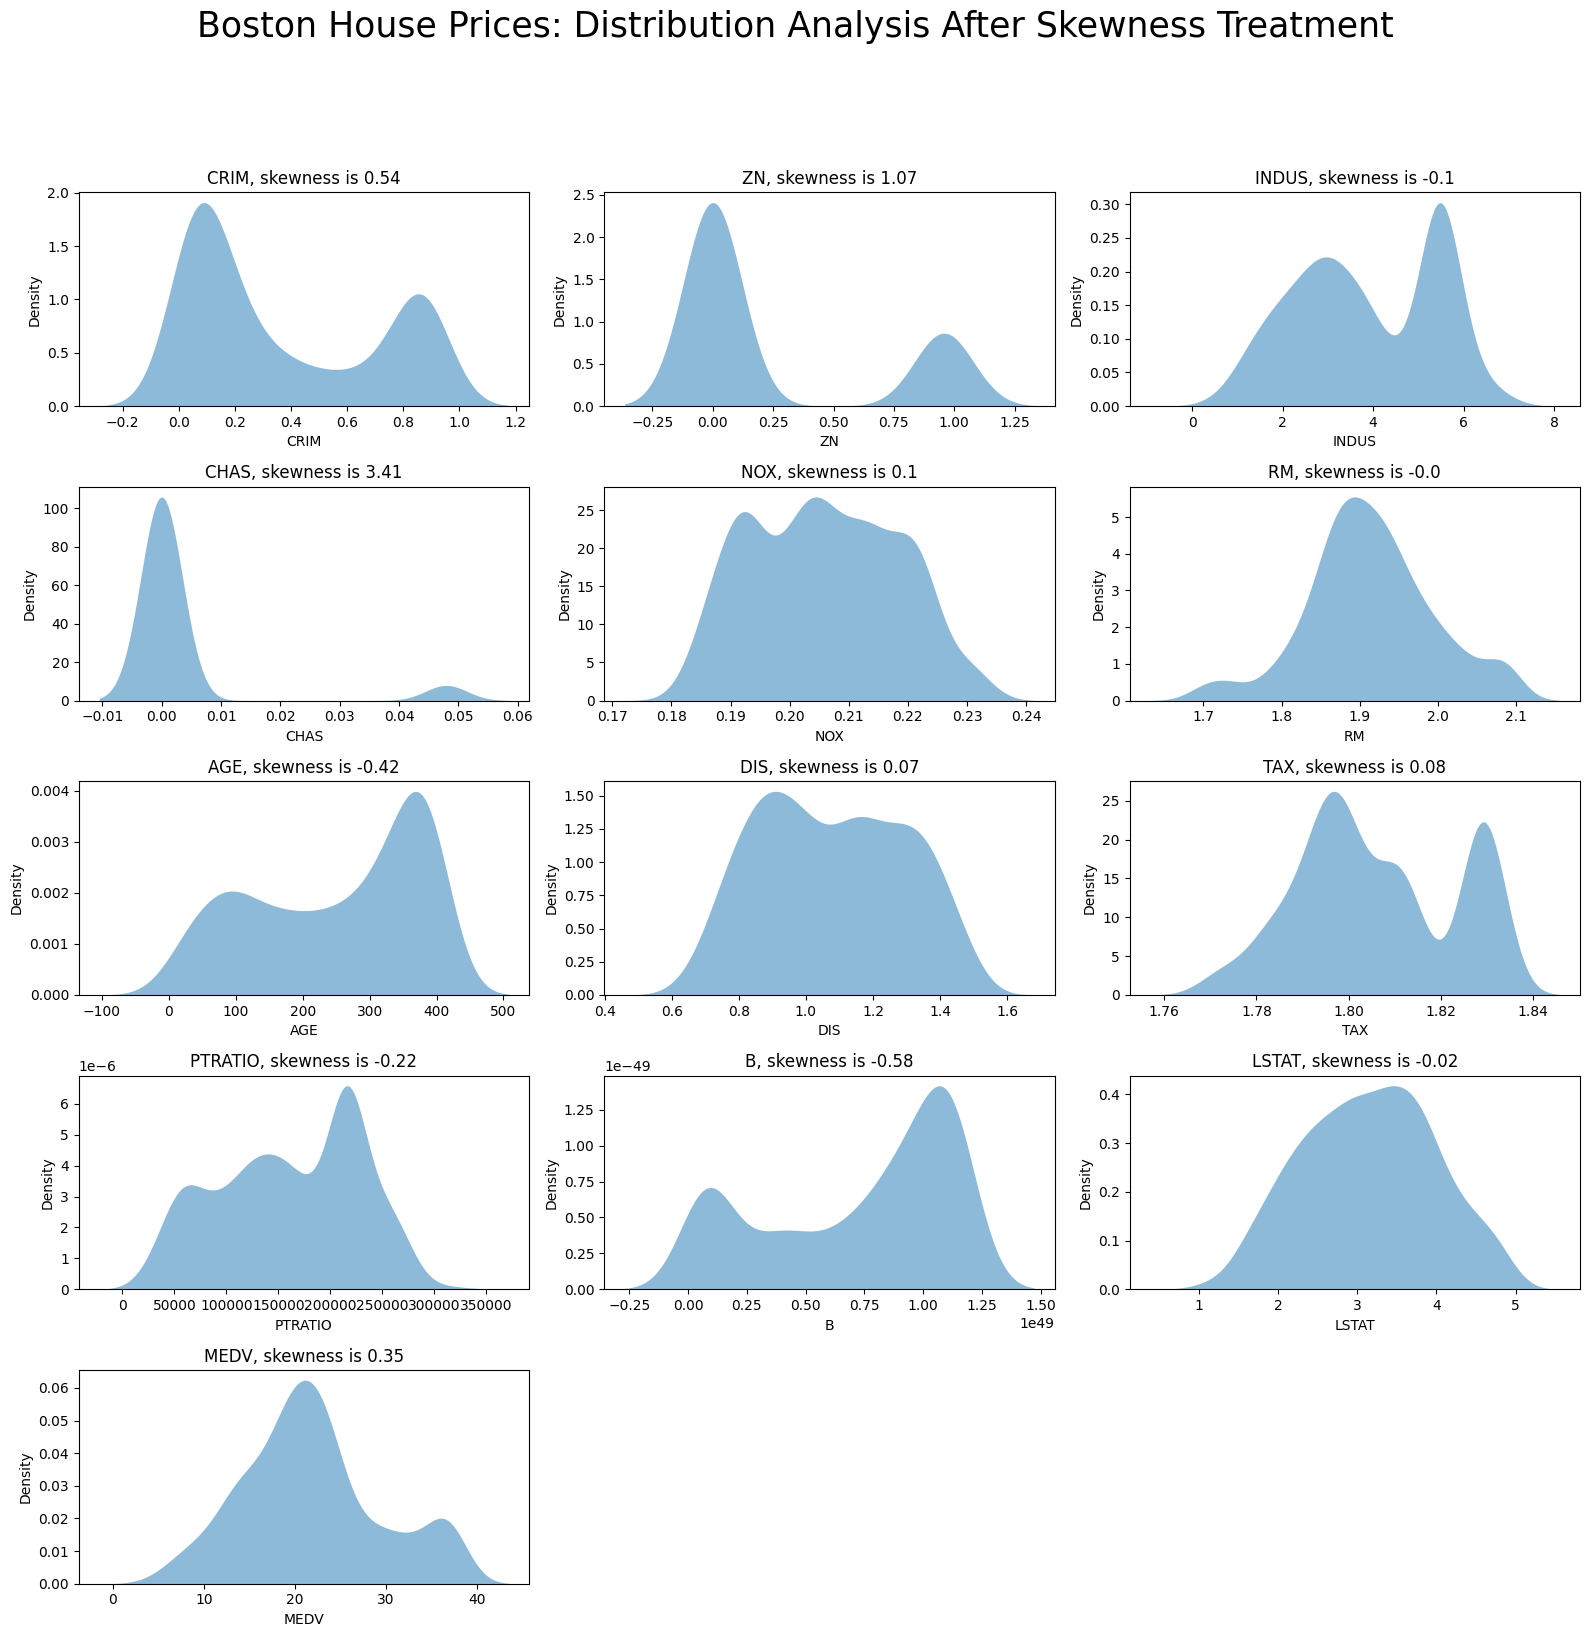

In [28]:
dist_custom(dataset=df, columns_list=df.columns, suptitle='Boston House Prices: Distribution Analysis After Skewness Treatment')

## Observation:-
Skewness was Drastically Reduced !!

In [29]:
numcol = []
for col in df.columns:
        numcol.append(col)
print(numcol)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


## Scaling The data to bring it in fixed range

In [30]:
numcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

In [31]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.977895,0.173687,0.0,0.488373,0.657614,0.556313,0.620889,0.424998,0.110371,1.000000,0.268643,24.0
1,0.023074,0.000000,0.435388,0.0,0.299163,0.607937,0.722790,0.711275,0.251084,0.325841,1.000000,0.471767,21.6
2,0.023052,0.000000,0.435388,0.0,0.299163,0.844610,0.508792,0.711275,0.251084,0.325841,0.807238,0.206124,34.7
3,0.028494,0.000000,0.163872,0.0,0.264757,0.788862,0.341909,0.800593,0.170813,0.432512,0.888019,0.121059,33.4
4,0.066236,0.000000,0.163872,0.0,0.264757,0.833389,0.431406,0.800593,0.170813,0.432512,1.000000,0.289621,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.059820,0.000000,0.614001,0.0,0.569256,0.663352,0.602529,0.377801,0.357352,0.794839,0.771796,0.492389,22.4
502,0.042073,0.000000,0.614001,0.0,0.569256,0.507684,0.695295,0.338226,0.357352,0.794839,1.000000,0.469377,20.6
503,0.057936,0.000000,0.614001,0.0,0.569256,0.782215,0.878869,0.311655,0.357352,0.794839,1.000000,0.307418,23.9
504,0.105015,0.000000,0.614001,0.0,0.569256,0.726486,0.856459,0.359622,0.357352,0.794839,0.834302,0.352420,22.0


## Dropping of duplicate column if any

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.shape

(506, 13)

## Spliting X and Y

In [34]:
X = df.drop(columns='MEDV')
y = df['MEDV']

## Train-Test Split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

## Model Training and Evaluation

In [36]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = adjusted_r2_score(r2, X_test.shape[0], X_test.shape[1])
    print(f"Model: {type(model).__name__}")
    print(f"r2: {r2* 100:.2f}%")
    print(f"Adjusted R²: {adj_r2 * 100:.2f}%")
    print()

Model: LinearRegression
r2: 81.36%
Adjusted R²: 78.85%

Model: DecisionTreeRegressor
r2: 77.53%
Adjusted R²: 74.51%

Model: RandomForestRegressor
r2: 86.11%
Adjusted R²: 84.23%

Model: GradientBoostingRegressor
r2: 85.80%
Adjusted R²: 83.89%

Model: XGBRegressor
r2: 84.21%
Adjusted R²: 82.08%



RandomForestRegressor is selected because of its high r2 and adjusted r2 score

## HyperParameter Training

### 1. using RandomizedSearchCV

In [37]:
# Defining the model
rf = RandomForestRegressor()

# Setting up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiating RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=1, n_jobs=-1, random_state=42)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Printing best parameters and best score
print()
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print()
print("Best Cross-validation MSE (RandomizedSearchCV):", -random_search.best_score_)
print()
# Get the best model
best_rf_random = random_search.best_estimator_

# Evaluating on training data
y_train_pred = best_rf_random.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = adjusted_r2_score(train_r2, X_train.shape[0], X_train.shape[1])

print(f"Training R2 Score (RandomizedSearchCV): {train_r2* 100:.2f}%")
print(f"Training Adjusted R2 Score (RandomizedSearchCV): {train_adj_r2* 100:.2f}%")
print()

# Evaluating on test data
y_test_pred = best_rf_random.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = adjusted_r2_score(test_r2, X_test.shape[0], X_test.shape[1])

print(f"Testing R2 Score (RandomizedSearchCV): {test_r2* 100:.2f}%")
print(f"Testing Adjusted R2 Score (RandomizedSearchCV): {test_adj_r2* 100:.2f}%")
print()

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters (RandomizedSearchCV): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Best Cross-validation MSE (RandomizedSearchCV): 7.305467006379392

Training R2 Score (RandomizedSearchCV): 97.80%
Training Adjusted R2 Score (RandomizedSearchCV): 97.73%

Testing R2 Score (RandomizedSearchCV): 87.10%
Testing Adjusted R2 Score (RandomizedSearchCV): 85.36%



### 2. Using GridSearchCV

In [38]:
rf = RandomForestRegressor()

# Setting up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=1, n_jobs=-1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Printing best parameters and best score
print()
print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print()
print("Best Cross-validation MSE (GridSearchCV):", -grid_search.best_score_)
print()

# Get the best model
best_rf_grid = grid_search.best_estimator_

# Evaluating on training data
y_train_pred = best_rf_grid.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = adjusted_r2_score(train_r2, X_train.shape[0], X_train.shape[1])

print(f"Training R2 Score (GridSearchCV): {train_r2* 100:.2f}%")
print(f"Training Adjusted R2 Score (GridSearchCV): {train_adj_r2* 100:.2f}%")
print()

# Evaluating on test data
y_test_pred = best_rf_grid.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = adjusted_r2_score(test_r2, X_test.shape[0], X_test.shape[1])

print(f"Testing R2 Score (GridSearchCV): {test_r2* 100:.2f}%")
print(f"Testing Adjusted R2 Score (GridSearchCV): {test_adj_r2* 100:.2f}%")
print()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters (GridSearchCV): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Cross-validation MSE (GridSearchCV): 7.308861520977669

Training R2 Score (GridSearchCV): 98.38%
Training Adjusted R2 Score (GridSearchCV): 98.33%

Testing R2 Score (GridSearchCV): 86.77%
Testing Adjusted R2 Score (GridSearchCV): 84.98%



Best params were taken from GridSearchCV as the result of both were very close but it took 1620 fits thats why

### Retraing Model with best params

In [39]:
best_params = {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
final_1 = RandomForestRegressor(**best_params)
final_1.fit(X_train, y_train)

# Predicting on test data
y_pred = final_1.predict(X_test)

# Evaluating on test data
y_test_pred = best_rf_grid.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
adj_r2 = adjusted_r2_score(r2, X_test.shape[0], X_test.shape[1])

print(f"R2 Score: {test_r2* 100:.2f}%")
print(f"Adjusted R²: {adj_r2 * 100:.2f}%")
print()

R2 Score: 86.77%
Adjusted R²: 82.08%



In [40]:
final_2 = RandomForestRegressor()
final_2.fit(X_train, y_train)
y_pred = final_2.predict(X_test)
r2 = r2_score(y_test,y_pred)
adj_r2 = adjusted_r2_score(r2, X_test.shape[0], X_test.shape[1])
print(f"r2: {r2* 100:.2f}%")
print(f"Adjusted R²: {adj_r2 * 100:.2f}%")

r2: 85.94%
Adjusted R²: 84.04%


## Geting Feature Importance

    Feature  Importance
11    LSTAT    0.567663
5        RM    0.222780
0      CRIM    0.074524
7       DIS    0.042170
6       AGE    0.020781
4       NOX    0.018215
8       TAX    0.017984
9   PTRATIO    0.015525
10        B    0.009512
2     INDUS    0.008106
1        ZN    0.001510
3      CHAS    0.001228


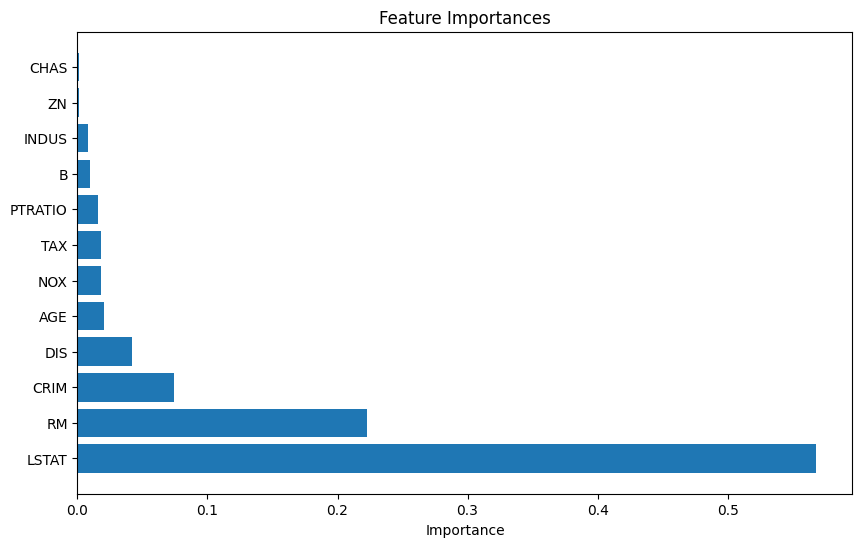

In [41]:
# Getting feature importances
feature_importances = final_2.feature_importances_

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()



## Final Model Training and Evaluation with best features

In [46]:
x = df[['LSTAT', 'RM', 'CRIM', 'NOX', 'PTRATIO', 'DIS', 'TAX', 'AGE']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [47]:
final = RandomForestRegressor()
final.fit(X_train, y_train)
y_pred = final.predict(X_test)

# Evaluatating the model
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2_score(r2, X_test.shape[0], X_test.shape[1])

In [48]:
print(f"R² Score: {r2 * 100:.2f}%")
print(f"Adjusted R²: {adj_r2 * 100:.2f}%")

R² Score: 85.88%
Adjusted R²: 84.66%


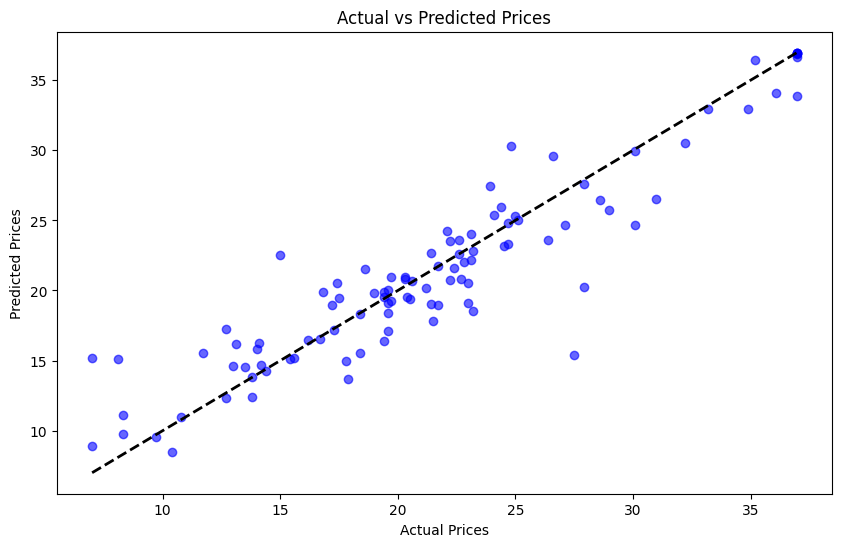

In [49]:
y_pred = final.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()